In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install factor_analyzer
!pip install sympy
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install pingouin
!pip install pyshp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 748.3 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=4b70780d352f47e852fbe1b04be78d5a65069908a3200de32698585f0826dca5
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
casas = pd.read_excel('/content/drive/MyDrive/Projetos Python MBA/preco_casas.xlsx')
casas.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value
0,201,177,3,1,3.3,10,6.8,0.90,165432
1,196,182,4,3,1.2,11,4.1,1.42,187043
2,198,182,4,4,5.9,20,2.1,4.12,148658
3,178,166,2,3,5.9,5,0.7,4.36,123785
4,183,165,3,1,3.8,8,0.7,0.42,156470


In [ ]:
casas.columns = ['tam_terrero', 'tam_casa', 'quartos','banheiros','dist_escola','idade_casa','dist_mercado','taxa_criminalidade','valor']

In [ ]:
casas.head()

,tam_terrero,tam_casa,quartos,banheiros,dist_escola,idade_casa,dist_mercado,taxa_criminalidade,valor
0,201,177,3,1,3.3,10,6.8,0.90,165432
1,196,182,4,3,1.2,11,4.1,1.42,187043
2,198,182,4,4,5.9,20,2.1,4.12,148658
3,178,166,2,3,5.9,5,0.7,4.36,123785
4,183,165,3,1,3.8,8,0.7,0.42,156470


In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tam_terrero         4954 non-null   int64  
 1   tam_casa            4954 non-null   int64  
 2   quartos             4954 non-null   int64  
 3   banheiros           4954 non-null   int64  
 4   dist_escola         4954 non-null   float64
 5   idade_casa          4954 non-null   int64  
 6   dist_mercado        4954 non-null   float64
 7   taxa_criminalidade  4954 non-null   float64
 8   valor               4954 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 348.5 KB


In [ ]:
casas.describe().round(2)

,tam_terrero,tam_casa,quartos,banheiros,dist_escola,idade_casa,dist_mercado,taxa_criminalidade,valor
count,4954.00,4954.00,4954.00,4954.0,4954.00,4954.00,4954.00,4954.00,4954.00
mean,250.13,231.25,3.79,3.2,3.45,11.44,3.51,2.99,201974.74
std,103.13,94.57,1.59,1.6,2.01,6.36,1.99,1.74,90031.88
min,100.00,85.00,1.00,1.0,0.10,1.00,0.10,0.01,32622.00
25%,180.00,165.00,3.00,2.0,1.70,6.00,1.80,1.47,136777.00
50%,235.00,217.50,4.00,3.0,3.40,11.00,3.50,3.02,194515.50
75%,295.00,274.00,5.00,4.0,5.20,17.00,5.30,4.49,246590.00
max,796.00,760.00,8.00,9.0,6.90,22.00,6.90,5.99,692086.00


In [ ]:
corr = casas.corr()
corr

,tam_terrero,tam_casa,quartos,banheiros,dist_escola,idade_casa,dist_mercado,taxa_criminalidade,valor
tam_terrero,1.000000,0.991371,0.898252,0.679780,-0.011094,0.006547,0.004692,0.007752,0.973662
tam_casa,0.991371,1.000000,0.894753,0.677722,-0.010658,0.008198,0.001966,0.008044,0.964163
quartos,0.898252,0.894753,1.000000,0.710043,-0.006162,0.003455,-0.007287,0.014644,0.912155
banheiros,0.679780,0.677722,0.710043,1.000000,-0.008322,0.000966,-0.002535,0.010655,0.686525
dist_escola,-0.011094,-0.010658,-0.006162,-0.008322,1.000000,0.011519,0.010095,-0.002084,-0.072357
idade_casa,0.006547,0.008198,0.003455,0.000966,0.011519,1.000000,-0.002793,-0.000667,-0.037958
dist_mercado,0.004692,0.001966,-0.007287,-0.002535,0.010095,-0.002793,1.000000,0.018026,-0.028634
taxa_criminalidade,0.007752,0.008044,0.014644,0.010655,-0.002084,-0.000667,0.018026,1.000000,-0.072801
valor,0.973662,0.964163,0.912155,0.686525,-0.072357,-0.037958,-0.028634,-0.072801,1.000000


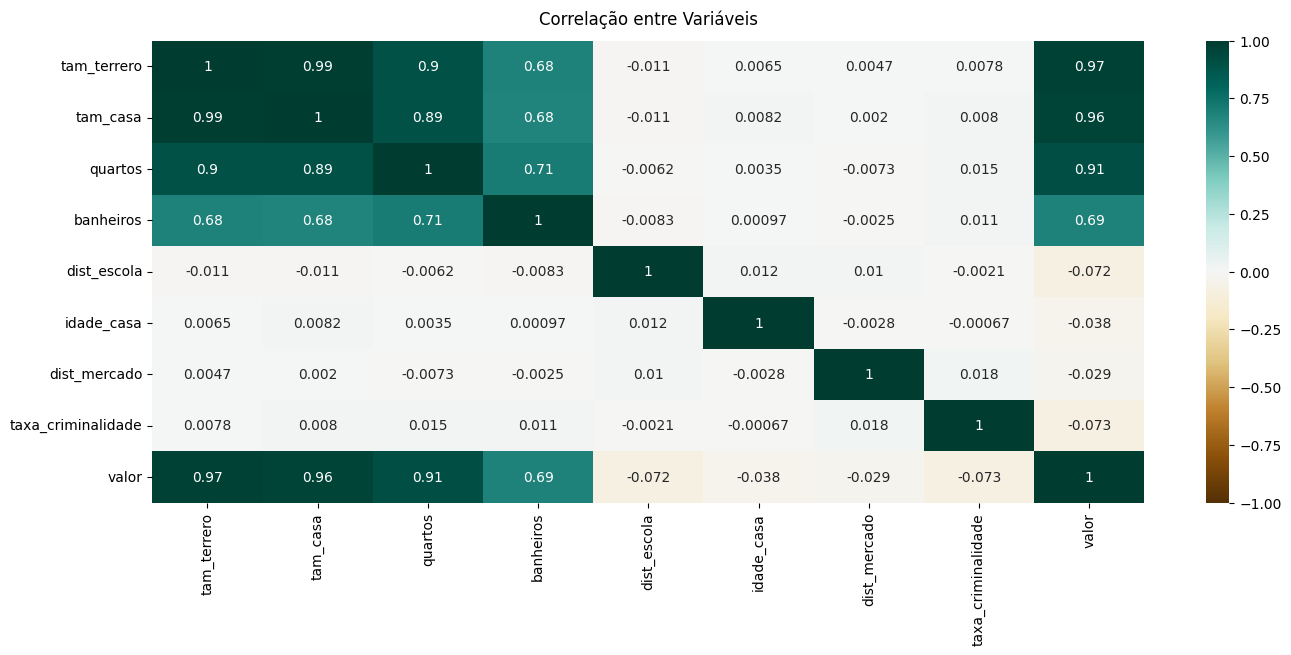

In [ ]:
# grafico de calor da corr

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação entre Variáveis', fontdict={'fontsize': 12}, pad=12);


In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 750,
    width = 750,
    yaxis=dict(autorange="reversed"))

fig.show()


In [ ]:
# removeremos o valor da propriedade para analise
casas_pca = casas.drop(columns=['valor'])

In [ ]:
casas_pca.head()

,tam_terrero,tam_casa,quartos,banheiros,dist_escola,idade_casa,dist_mercado,taxa_criminalidade
0,201,177,3,1,3.3,10,6.8,0.90
1,196,182,4,3,1.2,11,4.1,1.42
2,198,182,4,4,5.9,20,2.1,4.12
3,178,166,2,3,5.9,5,0.7,4.36
4,183,165,3,1,3.8,8,0.7,0.42


In [ ]:
bartlett, p_value = calculate_bartlett_sphericity(casas_pca)

print('Qui2: ', bartlett)
print('p_values: ', round(p_value,4))

Qui2:  31857.45566643539
p_values:  0.0


In [ ]:
fa = FactorAnalyzer(n_factors=8,method='principal', rotation=None).fit(casas_pca)

In [ ]:
autovalores = fa.get_eigenvalues()[0]

autovalores

array([3.44078793, 1.01989592, 1.01155913, 0.99164638, 0.97675882,
       0.42231466, 0.128448  , 0.00858917])

In [ ]:
fa = FactorAnalyzer(n_factors=3,method='principal', rotation=None).fit(casas_pca)

In [ ]:
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i,v in enumerate(tabela_eigen)]
tabela_eigen.index = ['Autovalor', 'Variancia','Variancia Acumulada']
tabela_eigen = tabela_eigen.T
tabela_eigen

,Autovalor,Variancia,Variancia Acumulada
Fator 1,3.440788,0.430098,0.430098
Fator 2,1.019896,0.127487,0.557585
Fator 3,1.011559,0.126445,0.684030


<ipython-input-42-7b2552874eb6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




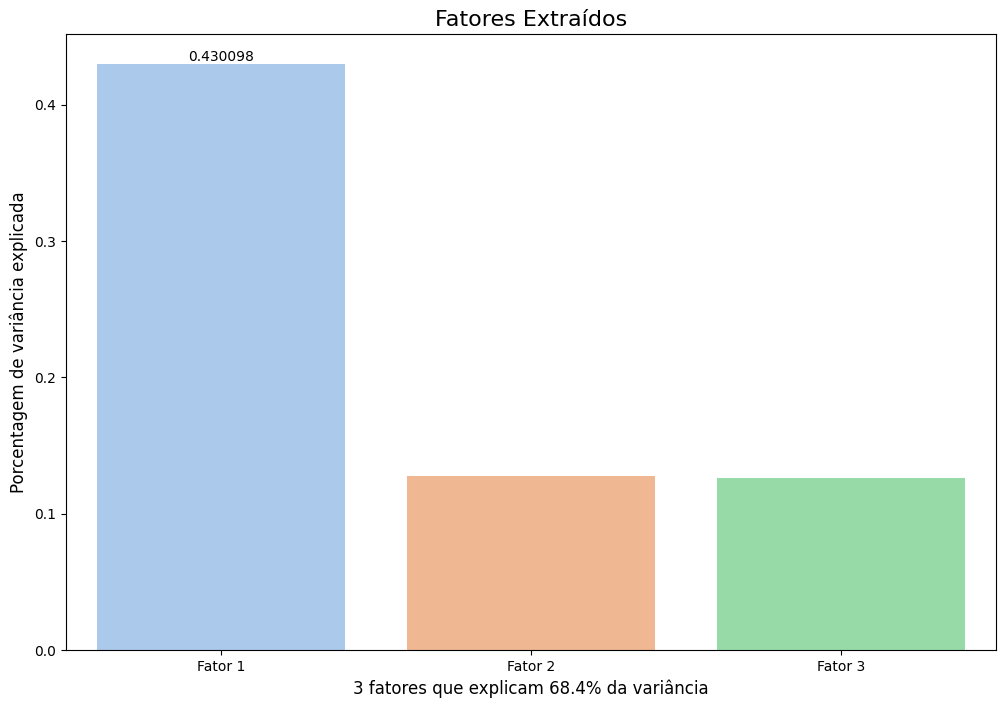

In [ ]:
# Variancia acumulada

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variancia'], data=tabela_eigen, palette='pastel')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variancia'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

In [ ]:
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i,v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = casas_pca.columns
tabela_cargas

,Fator 1,Fator 2,Fator 3
tam_terrero,0.969318,0.000670,0.003416
tam_casa,0.967866,-0.000800,0.005045
quartos,0.948705,-0.002536,0.002939
banheiros,0.814810,-0.002453,-0.002870
dist_escola,-0.013787,0.349991,0.642441
idade_casa,0.007448,0.080374,0.692606
dist_mercado,-0.000987,0.720297,-0.113461
taxa_criminalidade,0.015520,0.610001,-0.325882


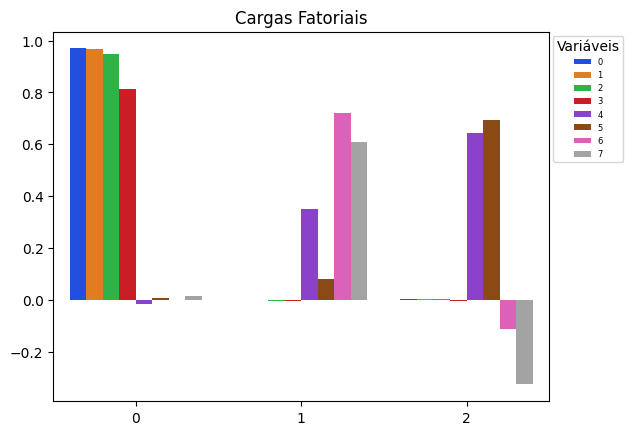

In [ ]:
tabela_cargas_graph = tabela_cargas.reset_index()
tabela_cargas_graph = tabela_cargas_graph.melt(id_vars='index')

sns.barplot(data=tabela_cargas_graph, x='variable', y='value', hue='index', palette='bright')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Cargas Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()


In [ ]:
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = casas_pca.columns

tabela_comunalidades

,Comunalidades
tam_terrero,0.939590
tam_casa,0.936791
quartos,0.900057
banheiros,0.663930
dist_escola,0.535414
idade_casa,0.486218
dist_mercado,0.531702
taxa_criminalidade,0.478541


In [ ]:
# Identificando os scores fatoriais
# Percentual de participacao de cada variavel na composicao do fator

scores_fatoriais = fa.weights_

tabela_scores = pd.DataFrame(scores_fatoriais)
tabela_scores.columns = [f"Fator {i+1}"for i,v in enumerate(tabela_scores.columns)]
tabela_scores.index = casas_pca.columns

tabela_scores

,Fator 1,Fator 2,Fator 3
tam_terrero,0.281714,0.000657,0.003377
tam_casa,0.281292,-0.000784,0.004987
quartos,0.275723,-0.002487,0.002906
banheiros,0.236809,-0.002405,-0.002837
dist_escola,-0.004007,0.343163,0.635100
idade_casa,0.002165,0.078806,0.684691
dist_mercado,-0.000287,0.706245,-0.112164
taxa_criminalidade,0.004510,0.598101,-0.322158


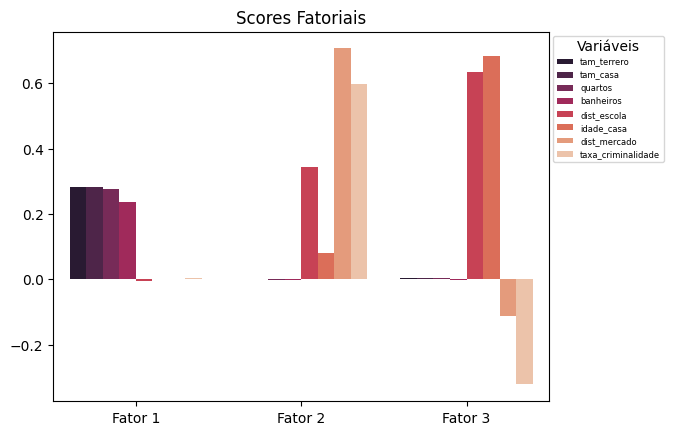

In [ ]:
# Analisando os scores fatoriais em cada fator extraído

tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette='rocket')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()


In [ ]:
# Extraindo os fatores
# Lembrando que o fator é o Score Fatorial x Z score(valores padronizados)

fatores = pd.DataFrame(fa.transform(casas_pca))
fatores.columns = [f"Fator {i+1}" for i,v in enumerate(fatores.columns)]

fatores.head()

,Fator 1,Fator 2,Fator 3
0,-0.763931,0.409791,-0.005071
1,-0.286895,-0.720208,-0.507750
2,-0.132644,0.413418,1.559236
3,-0.734837,-0.181887,-0.025554
4,-0.850848,-1.858475,0.369112


In [ ]:
# Incluindo fatores ao DF principal

casas = pd.concat([casas.reset_index(drop=True), fatores], axis=1)

In [ ]:
# Cargas fatoriais = correlacionam os fatores com a variavel original
# Score fatorial = é o peso de cada valor (Z) na composicao do fator


In [ ]:
# consolidação dos 3 fatores em uma medida única (soma ponderada)

casas['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variancia']

    casas['Ranking'] = casas['Ranking'] + casas[tabela_eigen.index[index]]*variancia

In [ ]:
casas.head()

,tam_terrero,tam_casa,quartos,banheiros,dist_escola,idade_casa,dist_mercado,taxa_criminalidade,valor,Fator 1,Fator 2,Fator 3,Ranking
0,201,177,3,1,3.3,10,6.8,0.90,165432,-0.763931,0.409791,-0.005071,-0.276964
1,196,182,4,3,1.2,11,4.1,1.42,187043,-0.286895,-0.720208,-0.507750,-0.279412
2,198,182,4,4,5.9,20,2.1,4.12,148658,-0.132644,0.413418,1.559236,0.192813
3,178,166,2,3,5.9,5,0.7,4.36,123785,-0.734837,-0.181887,-0.025554,-0.342472
4,183,165,3,1,3.8,8,0.7,0.42,156470,-0.850848,-1.858475,0.369112,-0.556207


In [ ]:
# Correlacao do ranking com a variavel valor

pg.rcorr(casas[['Ranking', 'valor']],
         method = 'pearson', upper = 'pval',
         decimals = 4,
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

,Ranking,valor
Ranking,-,***
valor,0.8494,-
